<a href="https://colab.research.google.com/github/xcellentbird/Study-Deep_Learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_%ED%8C%A8%EC%85%98MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras

#친전하게 트레인 셋과 테스트 셋을 나눠주셨다.
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#트레인 셋에는 28 x 28크기로 된 60000장의 데이터가 있다. 타겟은 분류값 60000개
print(train_input.shape, train_target.shape)

#테스트 셋에도 역시 28 x 28 크기로 된 10000장의 사진이 있고, 타겟에도 분류값 10000개가 있다.
print(test_input.shape, test_target.shape)

# 자, 이제 CNN을 이용하여 트레인 세트로 학습시키고(인풋과 타겟의 쌍을 지도 학습), 테스트 셋으로 학습 결과를 확인해본다(테스트 인풋을 주었을 때, 인풋 타겟값이 정확히 나오면 정답 인정!).

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


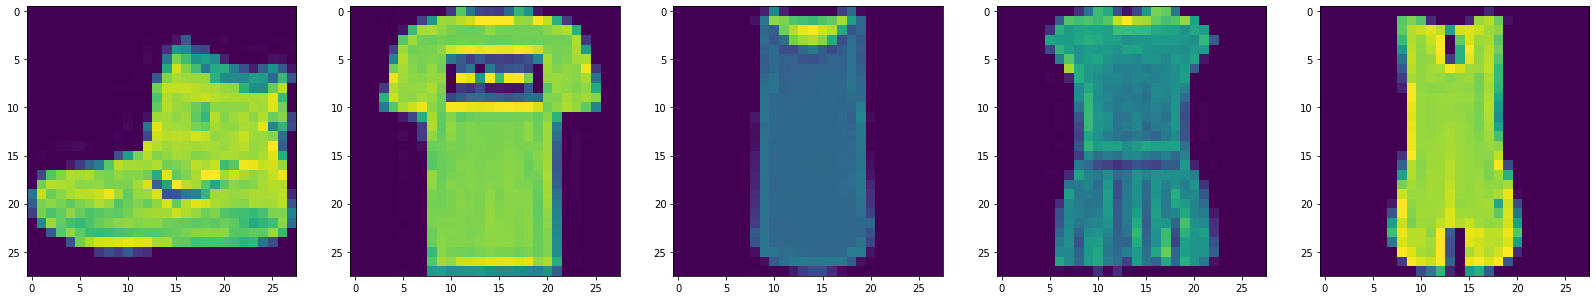

In [4]:
import matplotlib.pyplot as plt

# 이미지를 한번 확인해보자.
# 5개의 plot을 만들고, 데이터 크기만큼 보여주는 걸로
fig, axs = plt.subplots(1, 5, figsize=(28, 28))
for i in range(5):
  axs[i].imshow(train_input[i])
plt.show()

In [5]:
# 255 픽셀을 0~1 사이의 값으로 정규화
train_scaled = train_input / 255.0
print(train_scaled.shape)

# 정규화된 인풋 학습 데이터를 28*28개의 열로(즉, 2차원의 이미지를 1차원 28*28=784선으로) 나열한다.
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 28, 28)
(60000, 784)


In [6]:
import numpy as np
# 학습 타겟이, 즉, 분류값(레이블)이 10개가 있고, 각각 6000개씩 데이터가 있는 것을 확인할 수 있다.
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 먼저 다 까먹은 SGDClassifier에 대해서 설명하겠다...(다 까먹었다...)
# SGD는 확률적 경사하강법의 준말로(Stochastic Gradien Descent) 선형모델을 구현한다.
# 그냥 기울기 따라서 움직이는 것인데, 인자값을 잘못 설정하면, 구덩텅이 빠져서 타겟으로 수렴 안 할 수도 있다고
# 이제서야 기억이 나는데, 이번엔 인자값을 설명하도록
# loss(손실함수 def='hinge'이지만 여기에선 로그함수), max_iter(작업 수(반복 횟수)), random_state(난수 seed) 
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

# 분류기만 사용했을 때의 평균 점수
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([22.57596421, 22.32439661, 22.12707448, 21.97570705, 14.42460394]), 'score_time': array([0.05256844, 0.04057717, 0.05025172, 0.10388541, 0.03658533]), 'test_score': array([0.83116667, 0.83033333, 0.82441667, 0.83975   , 0.831     ])}
0.8313333333333333


In [8]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [9]:
# 스케일된 트레이닝 데이터와 타겟을 검증셋을 위해 20프로 설정해놓는다.
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [19]:
# 이전에 일차원으로 28*28 크기의 데이터가 들어가는 10개의 뉴런을 만들고 출력단에는 softmax 설정한
# Dense (완전 연결층)을 만든다. 10개의 뉴런인 이유는 10개의 분류 레이블이 있기 때문
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# dense 층을 이용하여 Sequential 클래스를 통해 신경망 모델로 만든다.
model = keras.Sequential(dense)

# 다중 분류 손실 함수 적용. 도표를 출력하여 확인하기 위해 metrics 매개변수 사용
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
print(train_target[:10])


[7 3 5 8 6 9 3 3 9 9]


Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7921 - accuracy: 0.7327
Epoch 2/2
375/375 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.8338
Epoch 1/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4565 - accuracy: 0.8483
Epoch 2/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4441 - accuracy: 0.8520
Epoch 3/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4375 - accuracy: 0.8547
Epoch 4/4
375/375 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8525
Epoch 1/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4277 - accuracy: 0.8594
Epoch 2/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4249 - accuracy: 0.8612
Epoch 3/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4211 - accuracy: 0.8615
Epoch 4/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4195 - accuracy: 0

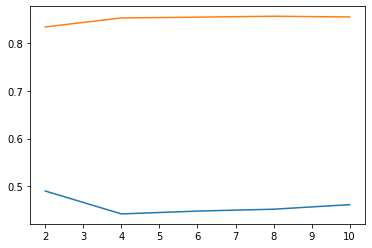

In [20]:
# epoch반복을 5회로 정하고 학습 및 평가
epoch_list = list(range(2, 11, 2))
score = []
for epoch in epoch_list:
  model.fit(train_scaled, train_target, epochs=epoch)
  score.append(model.evaluate(val_scaled, val_target))

plt.plot(epoch_list, score)
plt.show()